# Netflix is an application that keeps growing bigger and faster with its popularity, shows and content. This is a data-driven EDA that tells a tale using its data, a system of recommendations based on content, and a variety of graphs and visualisations.

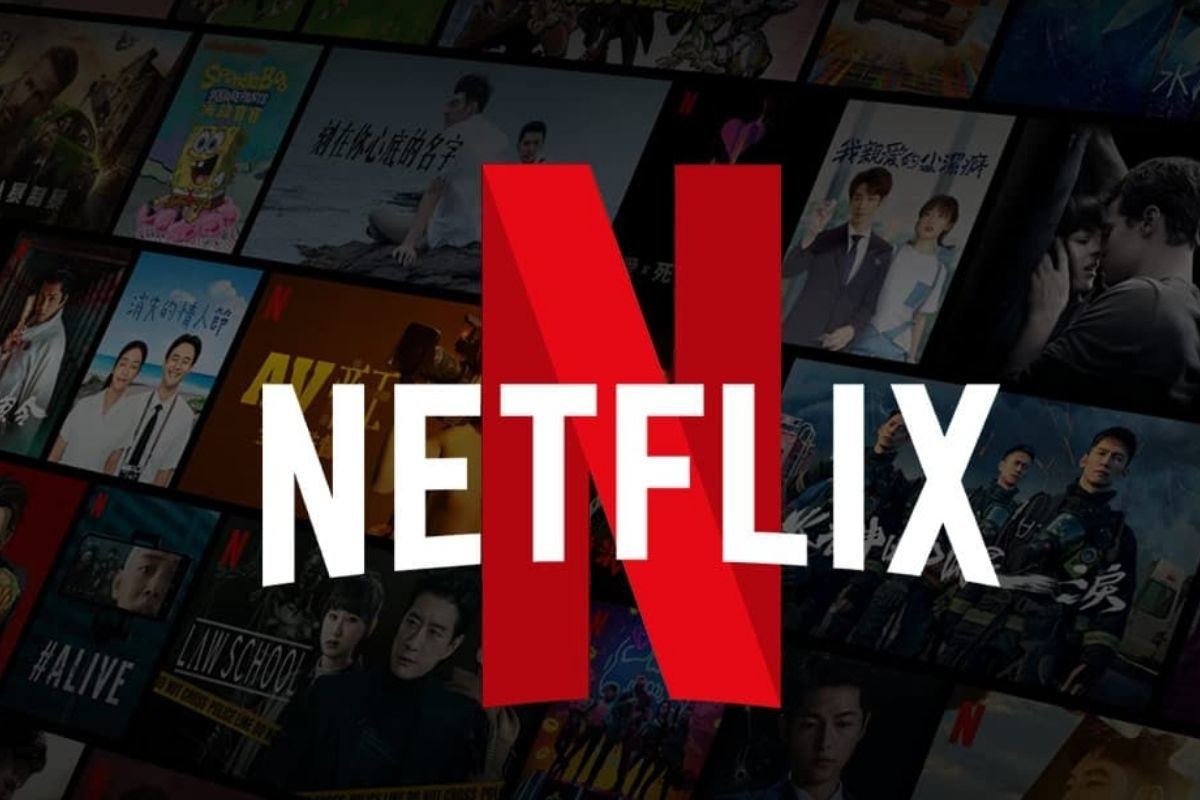
<!-- 
<div>
<img src="attachment:image.png" width="500"/>
</div> -->

#### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Loading the dataset

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [3]:
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

It is clear that the dataset contains 12 columns for exploratory analysis.

In [4]:
netflix.shape

(7787, 12)

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Checking for null values in the dataset

In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Analysis of Movies v/s TV SHows

In [7]:
netflix_shows = netflix[netflix["type"]=="TV Show"]
netflix_movies = netflix[netflix["type"]=="Movie"]

<AxesSubplot: xlabel='type', ylabel='count'>

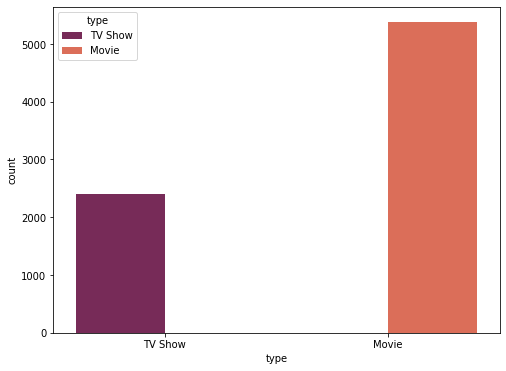

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x="type", data=netflix, palette="rocket", hue="type")

It is evident that there are more Movies than TV Shows on Netflix

### If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

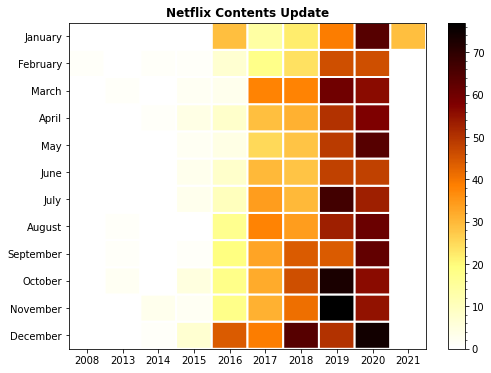

In [9]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(8,6))
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.minorticks_on()
plt.show()

If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

### Movie ratings analysis

<AxesSubplot: xlabel='rating', ylabel='count'>

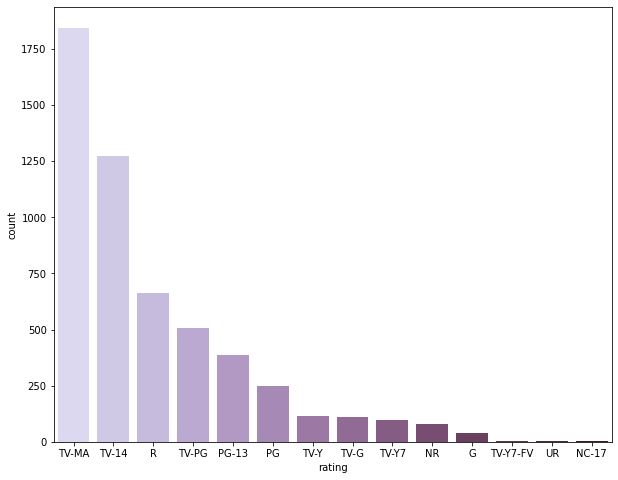

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating", data = netflix_movies, order=netflix_movies["rating"].value_counts().index,
              palette = "ch:start=.8,rot=-.3")

The largest count of movies are made with the 'TV-MA' rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating. An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

### Analysing IMDB ratings to get top rated movies on Netflix

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [11]:
imdb_ratings = pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})

ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Title Release Year  Rating                      Genre
0                   Miss Jerry         1894     5.9                    Romance
1  The Story of the Kelly Gang         1906     6.1    Biography, Crime, Drama
2               Den sorte drøm         1911     5.8                      Drama
3                    Cleopatra         1912     5.2             Drama, History
4                    L'Inferno         1911     7.0  Adventure, Drama, Fantasy

In [12]:
ratings.shape

(85852, 4)

In [13]:
ratings.isna().sum()

Title           0
Release Year    0
Rating          0
Genre           0
dtype: int64

In [14]:
joint_data = ratings.merge(netflix,left_on='Title',right_on='title',how='inner')

joint_data=joint_data.sort_values(by='Rating', ascending=False)
joint_data.head()

Title Release Year  Rating                      Genre  \
991           Innocent         2017     9.0                     Comedy   
1002          Breakout         2019     9.0   Adventure, Comedy, Drama   
398       Pulp Fiction         1994     8.9               Crime, Drama   
380   Schindler's List         1993     8.9  Biography, Drama, History   
1301         Inception         2010     8.8  Action, Adventure, Sci-Fi   

     show_id     type             title           director  \
991    s3009  TV Show          Innocent         Seren Yüce   
1002   s1093  TV Show          Breakout                NaN   
398    s5003    Movie      Pulp Fiction  Quentin Tarantino   
380    s5431    Movie  Schindler's List   Steven Spielberg   
1301   s2980    Movie         Inception  Christopher Nolan   

                                                   cast  \
991   Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...   
1002  Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...   
398   John Travolta, Samuel L. Jackson, Uma Thurman,...   
380   Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
1301  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   

                            country        date_added  release_year rating  \
991                          Turkey  January 23, 2019          2017  TV-MA   
1002                            NaN      July 1, 2017          2010  TV-14   
398                   United States   January 1, 2019          1994      R   
380                   United States     April 1, 2018          1993      R   
1301  United States, United Kingdom   January 1, 2020          2010  PG-13   

      duration                                          listed_in  \
991   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
1002  1 Season                  International TV Shows, TV Dramas   
398    154 min                Classic Movies, Cult Movies, Dramas   
380    195 min                             Classic Movies, Dramas   
1301   148 min    Action & Adventure, Sci-Fi & Fantasy, Thrillers   

                                            description  
991   In a peaceful, rustic town, a retired officer ...  
1002  After losing her family in a suspicious car cr...  
398   This stylized crime caper weaves together stor...  
380   Oskar Schindler becomes an unlikely humanitari...  
1301  In this mind-bending sci-fi thriller, a man ru...

### Top 10 rated movies on Netflix are:

In [15]:
top_rated=joint_data[0:10]

fig = px.sunburst(top_rated, path=['title','country'], values='Rating', color='Rating')
fig.show()

### Countries with highest rated content.

In [16]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)

top10countries=country_count[0:11]
top10countries

country
United States                      799
India                              701
United Kingdom                     107
Canada                              56
Philippines                         50
Spain                               40
South Korea                         36
Indonesia                           35
France                              33
United Kingdom, United States       31
Australia                           30

In [17]:
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])

fig = px.funnel(data, x='number', y='country')
fig.show()

### Year wise analysis

<AxesSubplot: xlabel='count', ylabel='release_year'>

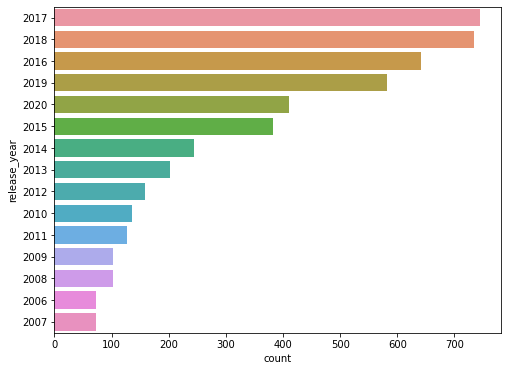

In [18]:
plt.figure(figsize=(8,6))

sns.countplot(y="release_year", data = netflix_movies,
              order=netflix_movies['release_year'].value_counts().index[0:15])

2017 was the year when most of the movies were released.

### TOP 10 MOVIE CONTENT CREATING COUNTRIES

In [19]:
countries={}

netflix_movies["country"] = netflix_movies["country"].fillna("Unknown")
cou = list(netflix_movies["country"])

for i in cou:
    i=list(i.split(','))
    
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

<ipython-input-19-96cfae8488dc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
countries_fin={}

for country,no in countries.items():
    country=country.replace(" ","")
    
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'India'),
 Text(9, 0, 'Japan')]

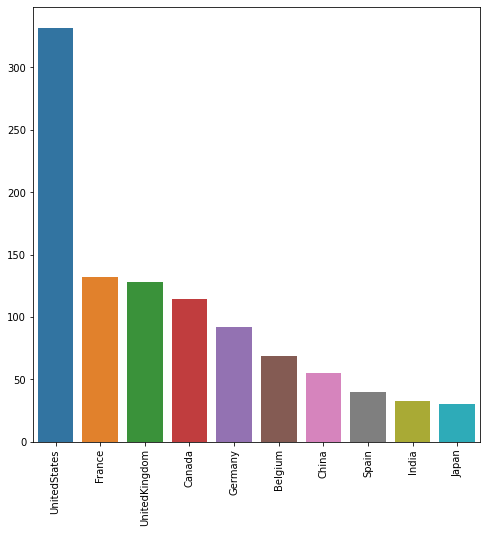

In [21]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

### Analysis on Duration of Movies

In [22]:
netflix_movies["duration"] = netflix_movies["duration"].str.replace(" min","")
netflix_movies["duration"] = netflix_movies["duration"].astype(str).astype(int)

<ipython-input-22-e15106b7bad4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-e15106b7bad4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: xlabel='duration', ylabel='Density'>

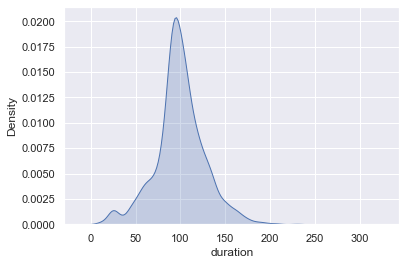

In [23]:
sns.set(style="darkgrid")
sns.kdeplot(data = netflix_movies["duration"], shade=True)

### TV shows with largest number of seasons

In [24]:
features = ["title","duration"]
durations = netflix_shows[features]

durations["no_of_seasons"] = durations["duration"].str.replace(" Season","")

durations["no_of_seasons"] = durations["no_of_seasons"].str.replace("s","")

<ipython-input-24-623dce19a14c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-623dce19a14c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
durations["no_of_seasons"] = durations["no_of_seasons"].astype(str).astype(int)

<ipython-input-25-14512faa9b12>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: xlabel='title'>

<Figure size 864x720 with 0 Axes>

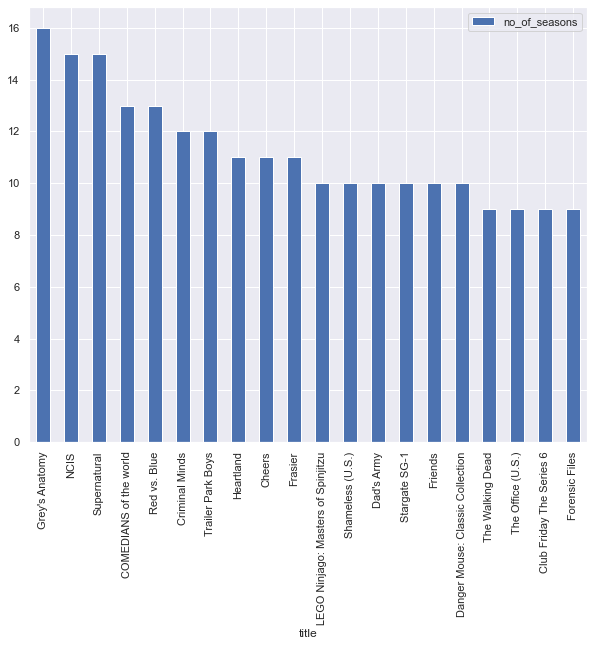

In [26]:
t=["title","no_of_seasons"]
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

plt.figure(figsize=(12,10))
top20=top[0:20]

top20.plot(kind='bar',x='title',y='no_of_seasons', figsize=(10,8))

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

##                                           Recommendation System(Content-based) 

# 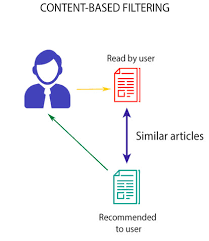

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix['description'] = netflix['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

There are about 17905 words described for the 7787 movies in this dataset.

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

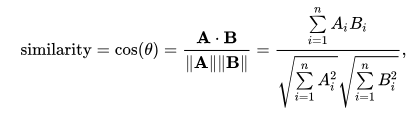

Since you have used the TF-IDF vectorizer, calculating the dot product between each vector will directly give you the cosine similarity score. Therefore, you will use sklearn's cosine_similarities().

This would return a matrix of shape 7787x7787, which means each movie overview cosine similarity score with every other movie overview. Hence, each movie will be a 7787 column vector where each column will be a similarity score with each movie.

In [29]:
# Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [30]:
indices = pd.Series(netflix.index, index=netflix["title"]).drop_duplicates()

In [31]:
# This recommendation is just based on the Plot.
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    print("Top 10 similar suggestions are:\n")
    arr = netflix["title"][movie_indices].values
    for i in arr:
        print(i)

In [32]:
get_recommendations("Peaky Blinders")

Top 10 similar suggestions are:

Our Godfather
My Stupid Boss
Don
The Fear
Jonathan Strange & Mr Norrell
Power Rangers Zeo
The Prison
The Tudors
The Con Is On
The Legend of Michael Mishra


In [33]:
get_recommendations("Mortel")

Top 10 similar suggestions are:

PILI Fantasy: War of Dragons
Edgar Rice Burroughs' Tarzan and Jane
Figures of Speech
My Entire High School Sinking Into the Sea
FirstBorn
Psychokinesis
At First Light
The Umbrella Academy
Chamatkar
Maharakshak Devi


You see that, while your system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by your present system.

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

# Content based filtering on the multiple metrics:

1. Title
2. Director
3. Cast
4. Listed in
5. Description

Filling null values with empty string.

In [34]:
netflix_filled = netflix.fillna('')

Identifying features on which the model is to be filtered.

In [35]:
features = ['title','director','cast','listed_in','description']
netflix_filled = netflix_filled[features]

Cleaning the data - making all the words lower case

Removing the spaces between words is an important preprocessing step. It is done so that your vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same. After this processing step, the aforementioned actors will be represented as "johnnydepp" and "johnnygalecki" and will be distinct to your vectorizer.

In [36]:
def clean_data(x):
    return str.lower(x.replace(" ", ""))

In [37]:
for feature in features:
    netflix_filled[feature] = netflix_filled[feature].apply(clean_data)

In [38]:
netflix_filled.head(3)

title         director                                               cast  \
0     3%                   joãomiguel,biancacomparato,michelgomes,rodolfo...   
1   7:19  jorgemichelgrau  demiánbichir,héctorbonilla,oscarserrano,azalia...   
2  23:59      gilbertchan  teddchan,stellachung,henleyhii,lawrencekoh,tom...   

                                        listed_in  \
0  internationaltvshows,tvdramas,tvsci-fi&fantasy   
1                      dramas,internationalmovies   
2                horrormovies,internationalmovies   

                                         description  
0  inafuturewheretheeliteinhabitanislandparadisef...  
1  afteradevastatingearthquakehitsmexicocity,trap...  
2  whenanarmyrecruitisfounddead,hisfellowsoldiers...

Creating a "bag of words" for all rows.

In [39]:
def create_bow(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [40]:
netflix_filled['bow'] = netflix_filled.apply(create_bow, axis=1)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(netflix_filled['bow'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [42]:
netflix_filled = netflix_filled.reset_index()
indices = pd.Series(netflix_filled.index, index = netflix_filled['title'])

In [43]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    print("Top 10 similar suggestions are:\n")
    arr = netflix['title'][movie_indices].values
    for i in arr:
        print(i)

In [44]:
get_recommendations_new("Peaky Blinders")

Top 10 similar suggestions are:

Giri / Haji
The Frankenstein Chronicles
The Murder Detectives
Loaded
Kiss Me First
Happy Valley
Get Even
How to Live Mortgage Free with Sarah Beeny
I AM A KILLER
Inside the Criminal Mind


In [45]:
get_recommendations_new("PK")

Top 10 similar suggestions are:

3 Idiots
The Legend of Michael Mishra
Anthony Kaun Hai?
Haapus
Sanju
Taare Zameen Par
Chal Dhar Pakad
Chance Pe Dance
Dostana
EMI: Liya Hai To Chukana Padega
